# <center>European call option, Binomial tree pricer</center>
Today our goal will be to calculate the value of a European call option with the binomial tree pricer. We will use the following main assumptions: 
* the option's underlying stock pays no dividends
* investors are insensitive to the volatility of the underlying (risk-free measure)
* any amount of the underlying can be purchased or sold at any time at zero cost

# <center>Before we start: Please do the following</center>
1. Refresh your knowledge by reading the following: [Call option](http://www.theoptionsguide.com/call-option.aspx), [Hedging](https://www.investopedia.com/articles/basics/03/080103.asp), [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)
2. Explain the call option (no dividends, european, underlying: apples) to someone who has never studied finance.<br/>
Use the example of a large fruit processing company who will buy 10 million kgs of fruit on October 15th.
3. Explain to the same person the futures contract, a forward, the put option and how the put can be priced with the put-call parity.

## Contents

| Theory        | Task         | Additional Tests |
| :------------ |:-------------|:------|
| [Definition: European call option](#Theory_EurCall) | [Call option payoff](#Task_CallPayoff) | |
| [Binomial tree model<br/>Pricing with a 1-step binomial tree](#Theory_BinomTree) | Plot option price vs. [spot](#Task_OptionPriceVsSpot) or [strike](#Task_OptionPriceVsStrike) | [1-step binomial tree pricer](#Test_BinomTreeOneStepRiskNeutral) |
| [Risk-neutral 2-step binomial tree](#Theory_TwoStepTree) | [Plot price with 1, 2 and 5-step tree](#Task_PlotOneTwoFiveStep) | [2-step pricer](#Test_TwoStepTree) |
| [Binomial coefficients, Binomial distribution](#Theory_BinomCoeffBinomDist) |  | [Binomial coefficients](#Test_BinomCoeff) |
| [Risk-neutral n-step, normalized](#Theory_nStepNormalized) | [Plot normalized n-step](#Plot_nStepNormalized) |  |
| [Next steps](#Next_Steps) |  |  |

## <a name="Theory_EurCall" style="text-decoration:none">Definition: European call option</a>
 
A call option is an agreement that gives an investor the right, but not the obligation, to buy the underlying for the strike price at the date of maturity.

#### Underlying asset
- stock index, futures, commodity, currency, index
- price of the derivative is based on the underlying

#### Maturity
- date on which the life of a financial instrument ends
- also called: date of expiry

#### Price of underlying
- price of underlying now: $S_{\ 0}$
- at maturity: $S_{\ T}$
- price of the underlying (at any selected time point): $S_{\ t}$

#### Price of option:
- also called: premium that you pay for the option
- the amount you pay when you buy an option
  - note: selling the option is also called "writing" the option

#### "Moneyness" at a selected time point
- ATM (at the money): $\ S_{\ t}=K$
- Out of the money (of a call option): $\ S_{\ t}<K$
- In the money (call option): $\ S_{\ t}>K$

#### Intrinsic value of an option
- At time $\ t $ this is the signed amount by which the option is in the money or out of the money: $\ S_{\ t} - K $

#### Payoff
- The amount that the writer pays to the buyer at the time of maturity:  $\ \max(\ S_{\ T} - K,\ 0\ ) $

#### European or American option
- No geographical meaning
- European: can be exercised only at the date of expiry
- American: can be excercised at any time point between the date of the contract and the date of the expiry
- Asian (average)
- Bermudan (fixed dates)

## <a name="Task_CallPayoff" style="text-decoration: none">Call option payoff</a>

<span style="background:#ffb2b2"><b>$\Rightarrow$ Note: The horizontal axis is _not_ time, but underlying value at time $T$ .</span></b>

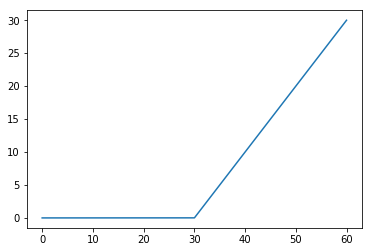

In [4]:
# === Minimal version ===
import numpy as np
import matplotlib.pyplot as plt
underlying_values = np.arange(0,60,0.01)
strike = 30
payoff = [0.0 if S < strike else S - strike for S in underlying_values ]
plt.plot(underlying_values,payoff)
plt.show()

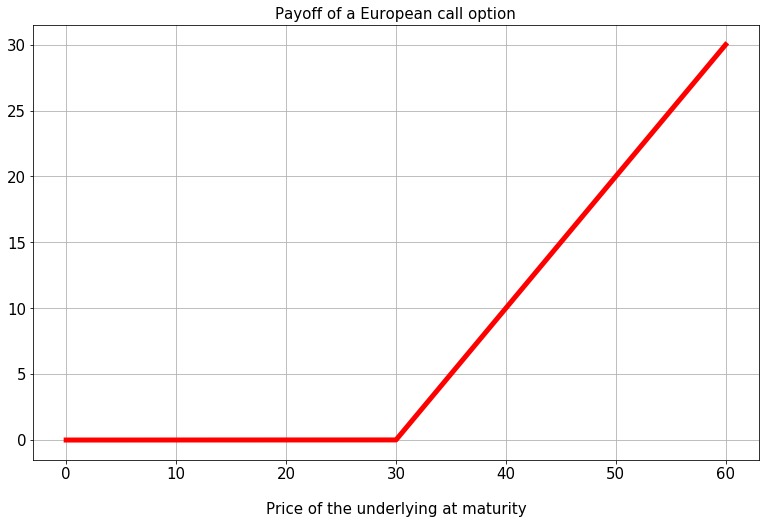

In [5]:
# === Formatted plotting ===

# === Try the following: ===
# (1) change strike price
# (2) change line color

# === Importing libraries ===
import numpy as np

# === Definitions ===
strike = 30 # strike price of the call option
range_min = 0 # starting point of the range where payoff values are plotted
range_max = 2*strike # end point of the plotting range
step = 0.001 # step size of for plotting
x_axis = np.arange(range_min, range_max, step) # the list of underlying stock price values for which the payoff are computed
payoff_values = [ 0.0 if x < strike else x - strike for x in x_axis ]

# === Plotting payoff of a European call option ===

# === Importing libraries and Setting values ===
import matplotlib.pyplot as plt
from matplotlib import rcParams # detailed parameter setting
plt.figure(figsize=(13, 8)) # resizing the figure
my_fontsize = 15
w = 5 # line width

# === Plotting ===
#plt.plot(x_axis, payoff_values, color='red', label='Payoff') # plot payoff values
#plt.legend(bbox_to_anchor=(1.05, 0.95), loc=2, borderaxespad=0., fontsize=my_fontsize) # position the legend
plt.plot(x_axis, payoff_values, color='red', lw=w) # plot payoff values
plt.xlabel('Price of the underlying at maturity', labelpad=20, fontsize=my_fontsize) # set the x label of the plot
rcParams['axes.titlepad'] = 20 # moving the title a little further away from the plot
plt.title("Payoff of a European call option", fontsize=my_fontsize)
plt.tick_params(labelsize=my_fontsize) # tick parameter font size
ax = plt.gca() # gca: get current axes
ax.grid(which='both') # set grid along both axes
plt.tick_params(labelsize=my_fontsize) # tick text font size

# === Display the entire plot ===
plt.show() # display the entire plot

## <a name="Theory_BinomTree" style="text-decoration: none">Binomial tree model for option pricing</a>

Discretized version of continuous time process: 
- at each time step the price of the underlying goes either up or down
- with an increasing number of steps (tree size), the tree's results converge to the continuous results (Black-Scholes)
- many-step binomial tree's center approximates well the center of the lognormal distribution
  - see: random walk up vs down with probabilities $\ p\ $ vs $\ (1-p)\ $
- real price change distributions are close to lognormal
  - main corrections to this will come after Black-Scholes-Merton pricing of call option

## <a name="one_step_binom" style="text-decoration: none">Risk-neutral pricing of a European call option<br/>on a non-dividend paying stock with a one-step binomial tree</a>

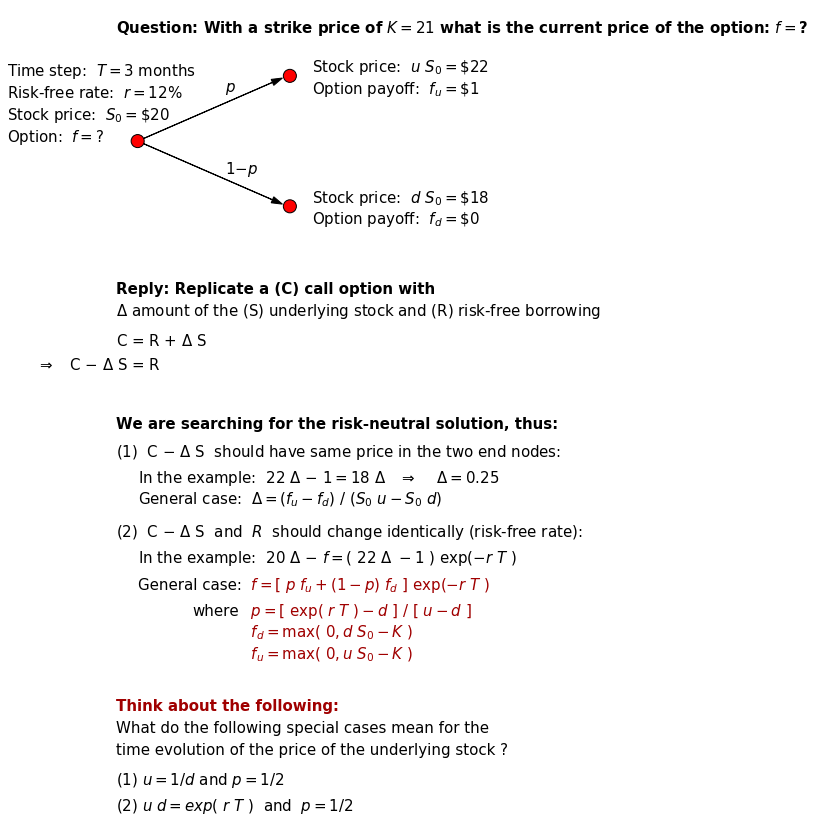

In [9]:
# === Image and text. No computation. ===

# Based on: Hull book Chapter 11, goo.gl/is8Y4S

# Importing libraries, Definitions
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
my_fontsize = 15

# A little graph with two arrows
circle_0 = Circle((.2,.4), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_down = Circle((.9,.7), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_up = Circle((.9,.1), .03, facecolor='r', edgecolor='k', lw=1, zorder=10)
ax = plt.gca() # get current axes
ax.cla() # clear things for fresh plot
ax.set_aspect('equal') # set aspect ratio to 'equal' to keep the circles really circles
plt.axis('off') # no axes for this plot
ax.add_artist(circle_0)
ax.add_artist(circle_up)
ax.add_artist(circle_down)
ax.arrow(.2, .4, .62, .27, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.2, .4, .62, -.27, head_width=.03, head_length=.05, fc='k', ec='k')

# Text around the little graph
ax.text(.1, .9, r'Question: With a strike price of $K=21$ what is the current price of the option: $f = $?', fontsize=my_fontsize, fontweight='bold')
ax.text(-.4, .7, r'Time step: $\ T = 3$ months', fontsize=my_fontsize)
ax.text(-.4, .6, r'Risk-free rate: $\ r = 12\%$', fontsize=my_fontsize)
ax.text(-.4, .5, r'Stock price: $\ S_0 = \$20$', fontsize=my_fontsize)
ax.text(-.4, .4, r'Option: $\ f = ?$', fontsize=my_fontsize)
ax.text(1., .72, r'Stock price: $\ u\ S_0 = \$22$', fontsize=my_fontsize)
ax.text(1., .62, r'Option payoff: $\ f_u = \$1$', fontsize=my_fontsize)
ax.text(1., .12, r'Stock price: $\ d\ S_0 = \$18$', fontsize=my_fontsize)
ax.text(1., .02, r'Option payoff: $\ f_d = \$0$', fontsize=my_fontsize)
ax.text(.6, .63, r'$p$', fontsize=my_fontsize)
ax.text(.6, .25, r'$1\minus p$', fontsize=my_fontsize)

# More text below the little graph
x2,y2 = .1,-.3
ax.text(x2,y2, r'Reply: Replicate a (C) call option with', fontsize=my_fontsize, fontweight='bold')
ax.text(x2,y2-.1, r'$\Delta$ amount of the (S) underlying stock and (R) risk-free borrowing', fontsize=my_fontsize)
ax.text(x2, y2-.24, r'C = R + $\Delta\ $S', fontsize=my_fontsize)
ax.text(x2-.43, y2-.35, r'$\ \ \ \Rightarrow\ \ \ $C$\ \minus$ $\Delta$ S = R', fontsize=my_fontsize)
ax.text(x2, y2-.62, r'We are searching for the risk-neutral solution, thus:', fontsize=my_fontsize, fontweight='bold')
ax.text(x2, y2-.75, r'(1) $\ $C $\minus\ \Delta\ $S$\ $ should have same price in the two end nodes:', fontsize=my_fontsize)
ax.text(x2+.1, y2-.87, r'In the example: $\ 22\ \Delta\ \minus\ 1 = 18\ \Delta\ \ \ \Rightarrow\ \ \ $ $\Delta=0.25$', fontsize=my_fontsize)
ax.text(x2+.1, y2-.97, r'General case: $\ \Delta=\left(f_u-f_d\right)\ /\ \left(S_0\ u-S_0\ d\right)$', fontsize=my_fontsize)
ax.text(x2, y2-1.12, r'(2) $\ $C $\minus\ \Delta\ $S$\ $ and $\ R\ $ should change identically (risk-free rate):', fontsize=my_fontsize)
ax.text(x2+.1, y2-1.24, r'In the example: $\ 20\ \Delta\ \minus\ f = \left(\ 22\ \Delta\ - 1\ \right)\ \exp( -r\ T\ )$', fontsize=my_fontsize)
ax.text(x2+.1, y2-1.36, r'General case:', fontsize=my_fontsize)
ax.text(x2+.35, y2-1.48, r'where', fontsize=my_fontsize)
ax.text(x2+.6, y2-1.36, r'$\ f = \left[\ p\ f_u + \left(1-p\right)\ f_d\ \right] \ \exp( -r\ T\ )$', fontsize=my_fontsize, color='#a00000')
ax.text(x2+.6, y2-1.48, r'$\ p = \left[\ \exp(\ r\ T\ ) - d\ \right]\ / \ \left[\ u - d \ \right] $', fontsize=my_fontsize, color='#a00000')
ax.text(x2+.6, y2-1.58, r'$\ f_d = \max\left(\ 0, d\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')
ax.text(x2+.6, y2-1.68, r'$\ f_u = \max\left(\ 0, u\ S_0 - K\ \right)$', fontsize=my_fontsize, color='#a00000')

ax.text(x2, y2-1.92, r'Think about the following:', fontsize=my_fontsize, fontweight='bold', color='#a00000')
ax.text(x2, y2-2.02, r'What do the following special cases mean for the', fontsize=my_fontsize)
ax.text(x2, y2-2.12, r'time evolution of the price of the underlying stock ?', fontsize=my_fontsize)
ax.text(x2, y2-2.26, r'(1) $u=1/d$ and $p=1/2$', fontsize=my_fontsize)
ax.text(x2, y2-2.38, r'(2) $u\ d = exp\left(\ r\ T\ \right)$  and  $p=1/2$  ', fontsize=my_fontsize)

plt.show() # display the entire plot

### Minimal version of plot: Option price vs Stock (underlying) price

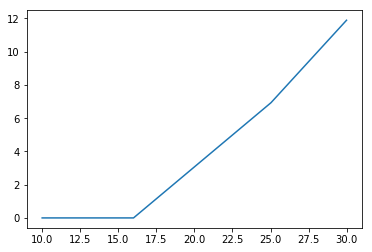

In [9]:
import numpy as np
import matplotlib.pyplot as plt
S_list = np.arange(10,30,.01) # underlying values
K = 20 # strike
u = 1.25
d = .8
r = .1
T = 1
p = (np.exp(r*T)-d)/(u-d)
prices = [(p*np.maximum(0.,u*S-K) + (1-p)*np.maximum(0.,d*S-K))*np.exp(-r*T) for S in S_list]
plt.plot(S_list,prices)
plt.show()

## <a name="Task_OptionPriceVsSpot" style="text-decoration: none">One-step Tree: Option price vs. Spot price</a>

### Pricer function for 1-step tree

In [13]:
# === Try the following: ===
# Observe the change of the option's pricing while you change the following:
# (1) change  u  and  d  while keeping  d < 1 < u
# (2) change  rT  over several orders of magnitude 
# (3) what happens if  exp(rT) > u ?

# === Importing libraries ===
import numpy as np

# === Definitions / General pricing formula ===
def call_binom_1_step(S0, K, u, d, r, T):
    ''' Risk-neutral pricing with a one-step binomial tree:
        European call option on a non-dividend paying stock

    Attributes
    ==========
    S0: float  current stock price, also called: spot price
    K:  float  strike price
    u:  float  stock price multiplier for the upper end node
    d:  float  multiplier for the lower end node
    r:  float  the constant risk-free rate
    T:  float  the time to maturity given in year fractions

    Note
    ====
    u  has to be  >  1
    d  has to be  <  1

    Output
    ======
    A tuple of two floats
        p: the probability of going up in the model
        f: present value of the call option '''

    # --- Conversions ---
    S0 = float(S0)
    K  = float(K)
    u  = float(u)
    d  = float(d)
    rT = float(r) * float (T)

    # --- Checking constrains ---
    assert u > 1
    assert d < 1
    
    # --- Option payoff in the upper end node and the lower end node ---
    fd = np.maximum( 0.0, d * S0 - K ) # option payoff in the "down" case
    fu = np.maximum( 0.0, u * S0 - K ) # option payoff in the "up" case

    # --- Probability of going up (p). Present value of the option (f) ---
    p  = ( np.exp(rT) - d ) / ( u - d )
    f  = ( p * fu + ( 1 - p ) * fd ) * np.exp( - 1.0 * rT )

    # --- Return the computed values ---
    return p, f 

### Plotting the price

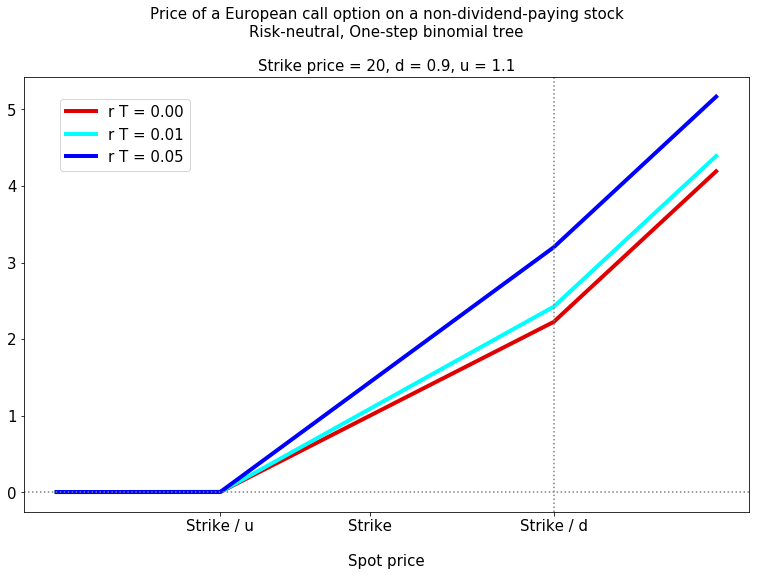

In [14]:
# === Try the following / Think about the following: ===
# (1) What is the slope of the option price for large spot price values, for example, spot > strike / d ?
# (2) What is the meaning of a small negative r * T value ?

# === Definitions / General pricing formula ===
# NOTE: we are using "class call_binom(object)" from the previous code cell

# === Importing libraries ===
import numpy as np
import matplotlib.pyplot as plt

# === Definitions ===
d = 0.9 # parameters of the binomial tree model 
u = 1.1 # parameters of the binomial tree model
K = 20 # current strike price
S0_min = np.square(d) * K # range of the horizontal (spot price) axis
S0_max = np.square(u) * K # range of the horizontal (spot price) axis
S0_step = (S0_max-S0_min)/1000.0 # step size on the horizontal axis for plotting
S0_axis = np.arange(S0_min, S0_max, S0_step) # range of strike price values to apply
T = 1.0 # time to maturity (in year fractions)
r_values = [0.0, 0.01, 0.05] # the list of values for the risk-free rate

# === Initializing the figure ===
plt.figure(figsize=(13, 8)) # resizing the figure
my_fontsize = 15
color_list = ["#e00000","#00ffff","#0000ff"] # the list of colors to be used for the curves
w = 4 # line width

# === Plotting: Function values ===
for r, current_color in zip(r_values, color_list): # compute for each rT product
    f_values = [] # list of values of the current price of the option
    # calculate the following for each spot price
    for S0 in S0_axis: 
        current_f = call_binom_1_step(S0, K, 1.1, 0.9, r, T)[1] # extract option price f
        f_values.append( current_f ) # save the current option price
    plt.plot(S0_axis, f_values, label="r T = %.2f" % (r * T), color=current_color, lw=w) # plot price for current r * T value

# === Plotting: Legend positon, Plot title, Horizontal axis label, Guiding dotted lines ===
plt.legend(bbox_to_anchor=(.05, .95), loc=2, borderaxespad=0., fontsize=my_fontsize) # legend position and font size
plt.title("Price of a European call option on a non-dividend-paying stock\n"+
              "Risk-neutral, One-step binomial tree\n\n"+
              "Strike price = %g, d = %g, u = %g" % (K, d, u), fontsize=my_fontsize) # plot title
plt.xlabel('Spot price', fontsize=my_fontsize, labelpad=20) # horizontal axis label
plt.axhline(0, c='gray', ls='dotted') # horizontal zero axis, dotted
plt.axvline(K / d, c='gray', ls='dotted') # vertical dotted line at Strike / d

# === Plot ticks ===
ax = plt.gca() # get current axes, the parameters of the current plot
ax.set_xticks([K/u,K,K/d]) # tick positions along the horizontal axis
ax.set_xticklabels(['Strike / u','Strike','Strike / d'], fontsize=my_fontsize) # horizontal axis tic labels 
ax.tick_params(labelsize=my_fontsize) # tick text font size

# === Plotting: Display ===
plt.show()

## <a name="Task_OptionPriceVsStrike" style="text-decoration: none">Option price vs. Strike price</a>

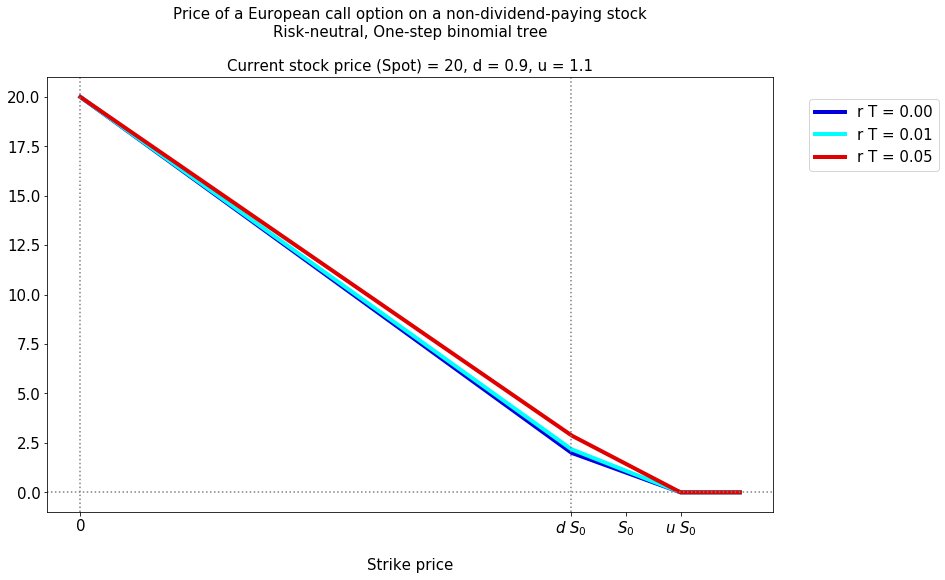

In [15]:
# === Importing and Settings for the Plot ===
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 8)) # resizing the figure
my_fontsize = 15

# === Definitions ===
S0 = 20 # current stock price
d = 0.9 # parameter of the binomial tree model: probability of going up
u = 1.1 # parameter of the binomial tree model: probability of going down
K_min = 0 # start the horizontal (strike price) axis from K_min
K_max = u*u * S0 # upper end point of the horizontal (strike price) axis
K_step = (K_max-K_min)/1000.0 # step size on the horizontal axis for plotting
K_axis = np.arange(K_min, K_max, K_step) # strike price values for which the option price will be calculated
T = 1.0 # time to maturity (in year fractions)
r_values = [0.0, 0.01, 0.05] # the list of values for the risk-free rate
color_list = ["#0000dd","#00ffff","#e00000"] # the list of colors to be used for the curves
w = 4 # line width

# === Plotting: Function values ===
for r, current_color in zip(r_values, color_list): # compute for each rT product
    f_values = [] # list of values of the current price of the option
    #f_test = 0.0 # === for testing === 
    for K in K_axis: # compute for each strike price
        (current_p, current_f) = call_binom_1_step(S0, K, 1.1, 0.9, r, T) # extract model parameter p and option price f
        #f_test = current_p * ( u * S0 - d * S0 ) * np.exp(-rT) # === test: option price at Strike=Spot*d ===
        f_values.append( current_f ) # save the current option price
    # === Version without test ===
    plt.plot(K_axis, f_values, label="r T = %.2f" % (r * T), color=current_color, lw=w) # plot price for current r * T value
    # === Version with test ===
    #plt.plot(K_axis, f_values, label="r T = %.1f  (test=%.2g)" % (r * T, f_test),
    #         color=current_color, lw=w) # plot price for the current rT product, add test value to the label
    #lt.axhline(f_test, c='gray', ls='dotted') # horizontal axis at test level

# === Plotting: Legend positon, Plot title, Horizontal axis label, Guiding dotted lines ===
plt.legend(bbox_to_anchor=(1.05, .95), loc=2, borderaxespad=0., fontsize=my_fontsize) # legend position and font size
plt.title("Price of a European call option on a non-dividend-paying stock\n"+
              "Risk-neutral, One-step binomial tree\n\n"+
              "Current stock price (Spot) = %g, d = %g, u = %g" % (S0, d, u), fontsize=my_fontsize) # plot title
plt.xlabel('Strike price', fontsize=my_fontsize, labelpad=20) # horizontal axis label
plt.axhline(0, c='gray', ls='dotted') # horizontal zero axis, dotted
plt.axvline(d*S0, c='gray', ls='dotted') # vertical dotted line at d * Spot
plt.axvline(0.0, c='gray', ls='dotted') # vertical zero axis

# === Plotting: Ticks ===
ax1 = plt.gca() # get current axes, the parameters of the current plot
ax1.set_xticks([0,d*S0,S0,u*S0]) # tick positions along the horizontal axis
ax1.set_xticklabels(["0","$d\ S_0$","$S_0$","$u\ S_0$"], fontsize=my_fontsize) # horizontal axis tic labels 
ax1.tick_params(labelsize=my_fontsize) # tick text font size

# === Plotting: Display ===
plt.show()

## <a name="Test_BinomTreeOneStepRiskNeutral" style="text-decoration: none">Test: One-step binomial tree pricer</a>
Risk-neutral, Underlying pays no dividends

In [17]:
# === Test: Print option price for the value shown in the above example, Output value should be 0.632995 ===
o = call_binom_1_step(20, 21, 1.1, 0.9, 0.03, 1.0) # new object containing the binomial tree pricer
o[1] # the second returned item is the option price

0.63299509903171325

## <a name="Theory_TwoStepTree" style="text-decoration: none">Two-step binomial tree</a>
Underlying pays no dividends, Risk-neutral pricing

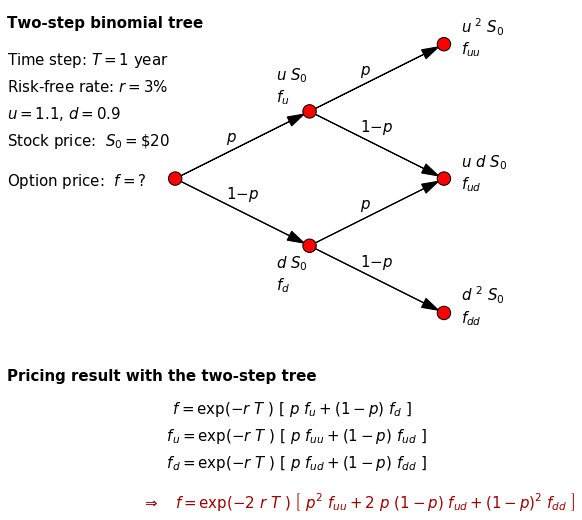

In [18]:
# === Image and text. No computation. ===

# Based on: Hull book Figure 11.4, goo.gl/is8Y4S

# === Importing libraries. Plot settings. ===
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
my_fontsize = 15
plt.figure(figsize=(10, 6.18)) # resizing the figure

# === Circles ===
circle_0 = Circle((.1,.5), .02, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_d = Circle((.5,.7), .02, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_u = Circle((.5,.3), .02, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_dd = Circle((.9,.1), .02, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_ud = Circle((.9,.5), .02, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_uu = Circle((.9,.9), .02, facecolor='r', edgecolor='k', lw=1, zorder=10)
ax = plt.gca() # get current axes
ax.cla() # clear things for fresh plot
ax.set_aspect('equal') # set aspect ratio to 'equal' to keep the circles really circles
plt.axis('off') # no axes for this plot
ax.add_artist(circle_0)
ax.add_artist(circle_d)
ax.add_artist(circle_u)
ax.add_artist(circle_dd)
ax.add_artist(circle_ud)
ax.add_artist(circle_uu)

# === Arrows ===
ax.arrow(.1, .5, .34, .17, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.1, .5, .34, -.17, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.5, .7, .34, .17, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.5, .7, .34, -.17, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.5, .3, .34, .17, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(.5, .3, .34, -.17, head_width=.03, head_length=.05, fc='k', ec='k')

# === Text and Math ===
ax.text(-0.4, .95, r'Two-step binomial tree', fontsize=my_fontsize, fontweight='bold')
ax.text(-.4, .84, r"Time step: $T = 1$ year", fontsize=my_fontsize)
ax.text(-.4, .76, r"Risk-free rate: $r=3\%$", fontsize=my_fontsize)
ax.text(-.4, .68, r"$u=1.1$, $d=0.9$", fontsize=my_fontsize)
ax.text(-.4, .60, r"Stock price: $\ S_0 = \$20$", fontsize=my_fontsize)
ax.text(-.4, .48, r"Option price: $\ f = ?$", fontsize=my_fontsize)
ax.text(.4, 0.73, "$u\ S_0$\n$f_u$", fontsize=my_fontsize)
ax.text(.4, 0.17, "$d\ S_0$\n$f_d$", fontsize=my_fontsize)
ax.text(.25, .61, r'$p$', fontsize=my_fontsize)
ax.text(.25, .44, r'$1\minus p$', fontsize=my_fontsize)
ax.text(.65, .81, r'$p$', fontsize=my_fontsize)
ax.text(.65, .64, r'$1\minus p$', fontsize=my_fontsize)
ax.text(.65, .41, r'$p$', fontsize=my_fontsize)
ax.text(.65, .24, r'$1\minus p$', fontsize=my_fontsize)
ax.text(.95, 0.87, "$u^{\ 2}\ S_0$\n$f_{uu}$", fontsize=my_fontsize)
ax.text(.95, 0.47, "$u\ d\ S_0$\n$f_{ud}$", fontsize=my_fontsize)
ax.text(.95, 0.07, "$d^{\ 2}\ S_0$\n$f_{dd}$", fontsize=my_fontsize)

ax.text(-0.4, -0.1, r'Pricing result with the two-step tree', fontsize=my_fontsize, fontweight='bold')
ax.text(0.08, -0.2, r'$\ f = \exp( -r\ T\ )\ \left[\ p\ f_u + \left(1-p\right)\ f_d\ \right]$', fontsize=my_fontsize)
ax.text(0.06, -0.28, r'$\ f_u = \exp( -r\ T\ )\ \left[\ p\ f_{uu} + \left(1-p\right)\ f_{ud}\ \right]$', fontsize=my_fontsize)
ax.text(0.06, -0.36, r'$\ f_d = \exp( -r\ T\ )\ \left[\ p\ f_{ud} + \left(1-p\right)\ f_{dd}\ \right]$', fontsize=my_fontsize)
ax.text(0, -0.48, r'$\Rightarrow\ \ \ f= \exp\left(-2\ r\ T\ \right)\ \left[\ p^2\ f_{uu}+2\ p\ \left(1-p\right)\ f_{ud}+\left(1-p\right)^2\ f_{dd}\ \right]$',
        fontsize=my_fontsize, color='#a00000')

plt.show() # display the entire plot

## <a name="Task_PlotOneTwoFiveStep" style="text-decoration: none">Plot option price with 1-step tree, 2-step tree and 5-step tree</a>

### <i>Pricer with 2-step tree</i>

In [19]:
# === Importing libraries ===
import numpy as np

# === Definitions / General pricing formula ===
def call_binom_2_step(S0, K, u, d, r, T):
    ''' Function for the risk-neutral pricing of a European call option
        on a non-dividend paying underlying stock with a 2-step binomial tree

    Attributes
    ==========
    S0: float  current stock price, also called: spot price
    K:  float  strike price
    u:  float  stock price multiplier for the upper end node
    d:  float  multiplier for the lower end node
    r:  float  the constant risk-free rate
    T:  float  the time to maturity given in year fractions

    Note
    ====
    u  has to be  >  1
    d  has to be  <  1

    Output
    ======
    A tuple of two floats
        p: the probability of going up in the model
        f: present value of the call option '''

    # --- Conversions ---
    S0 = float(S0)
    K  = float(K)
    u  = float(u)
    d  = float(d)
    rT = float(r) * float(T)

    # --- Checking constrains ---
    assert u > 1
    assert d < 1
        
    # --- Probability of going up. Option payoff values at end nodes. ---
    p  = ( np.exp(rT) - d ) / ( u - d ) 
    fuu = np.maximum( 0.0, u * u * S0 - K ) # option payoff in the top end node, reached by going up twice
    fud = np.maximum( 0.0, u * d * S0 - K ) # option payoff in the middle end node
    fdd = np.maximum( 0.0, d * d * S0 - K ) # option payoff in the bottom end node

    # --- Option price ---
    f  = np.exp( ( - 2.0 ) * rT ) * ( p * p * fuu + 2.0*p*(1.0-p) * fud + (1.0-p)*(1.0-p) * fdd ) 

    # --- Return the calculated values ---
    return p, f

### <a name="Test_TwoStepTree" style="text-decoration: none"><i>Test: Two-step binomial tree pricer</i></a>

In [20]:
# === Test: Print option price for a specific example, rT=0.03 (output value should be 1.28218) ===
o = call_binom_2_step(20, 21, 1.1, 0.9, 0.03, 1.0)
o[1]

1.2821849452741403

### <i>Pricer with 5-step tree</i>

In [21]:
# === Importing libraries ===
import numpy as np
from scipy import special

# === Definitions / General pricing formula ===
def call_binom_5_step(S0, K, u, d, r, T):
    ''' Function for the risk-neutral pricing of a European call option
        on a non-dividend paying underlying stock with a 5-step binomial tree

    Attributes
    ==========
    S0: float  current stock price, also called: spot price
    K:  float  strike price
    u:  float  stock price multiplier for the upper end node
    d:  float  multiplier for the lower end node
    r:  float  the constant risk-free rate
    T:  float  the time to maturity given in year fractions

    Note
    ====
    u  has to be  >  1
    d  has to be  <  1

    Output
    ======
    A tuple of two floats
        p: the probability of going up in the model
        f: present value of the call option '''
    
    # --- Conversions ---
    S0 = float(S0)
    K  = float(K)
    u  = float(u)
    d  = float(d)
    rT = float(r) * float(T)
    
    # --- Checking constrains ---
    assert u > 1
    assert d < 1
    
    # --- Probability of going up ---
    p  = ( np.exp(rT) - d ) / ( u - d ) 

    # --- Option payoff values at end nodes ---
    fend = []
    fend.append( np.maximum( 0.0, np.power(u,5) * S0 - K ) ) # option payoff at top end node, reach by going up 5 times
    fend.append( np.maximum( 0.0, np.power(u,4) * d             * S0 - K ) ) # option payoff at node second from top
    fend.append( np.maximum( 0.0, np.power(u,3) * np.power(d,2) * S0 - K ) )
    fend.append( np.maximum( 0.0, np.power(u,2) * np.power(d,3) * S0 - K ) )
    fend.append( np.maximum( 0.0, u             * np.power(d,4) * S0 - K ) )
    fend.append( np.maximum( 0.0,                 np.power(d,5) * S0 - K ) )

    # --- The probabilities along the paths ---
    # We need to index from 0 to 5, thus, arange has the argument 6.
    # fend[0] is at the top end node. Keep the same order of the indexes here. 
    plist = [ special.binom(5,k) * np.power(p,5-k) * np.power(1.0-p,k) for k in np.arange(6) ]
    
    # --- The option price: dot product of the vectors fend and plist ---
    f = np.exp( (-5.0) * rT ) * sum( [ _[0] * _[1] for _ in zip(fend, plist) ])
    
    # --- Return the calculated values ---
    return p, f

### <i>Plotting the option price with the 1-, 2-, and 5-step tree</i>

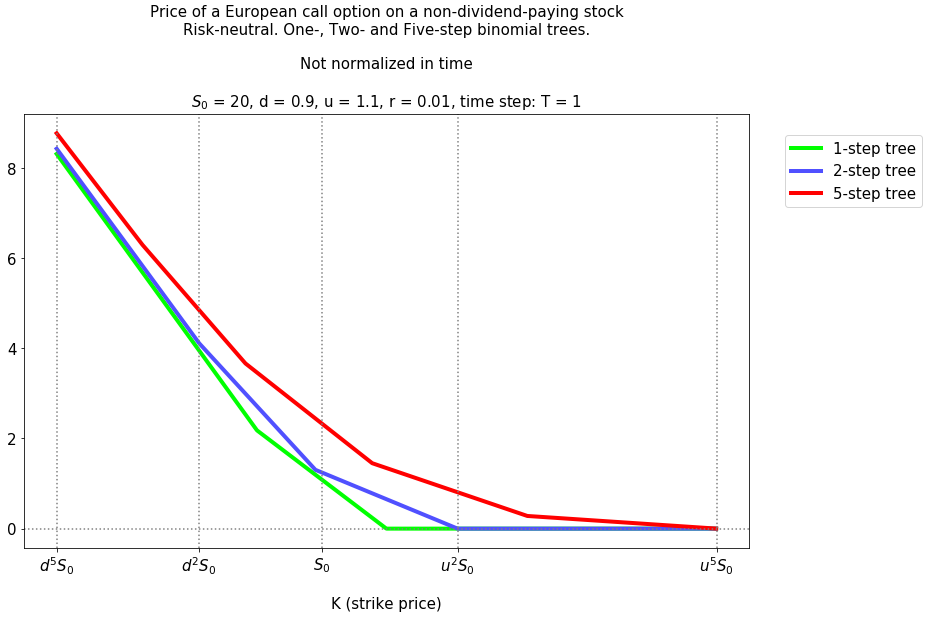

In [22]:
# === Think about the following: ===
# Observe the change of the option's pricing while you change the following:
# (1) Change  u  and  d  while keeping  d < 1 < u
# (2) Change  rT  over several orders of magnitude
# (3) What does strike price = 0 mean ?
# (4) Why are all prices identical at K = 0 ?
# (5) Why is the price calculated with the 5-step tree higher than the price with the n=1 and n=2 trees ?
#     In other words: why does the price not converge with growing n ?

# === Importing ===
import matplotlib.pyplot as plt

# === Definitions for Plotting ===
plt.figure(figsize=(13, 8)) # resizing the figure
S0 = 20 # current stock price
d = 0.9 # parameters of the binomial tree model 
u = 1.1 # parameters of the binomial tree model
K_min = S0 * np.power(d,5) # range of the horizontal (strike price) axis
K_max = S0 * np.power(u,5) # range of the horizontal (strike price) axis
K_axis = np.arange(K_min, K_max, (K_max-K_min)/1000.0) # range of strike price values to apply
my_fontsize = 15
r = 0.01 # risk-free rate
T = 1.0 # time to maturity of the option (in years)
color_list = ["#00ff00","#5050ff","#ff0000"] # colors for plotting
w = 4 # line width

# === Calculating the option price for all strike values (K) and the three different tree depths ====
f = dict() # f[K][n] is the calculated option price value with K strike price for the n-step binomial tree, n=1,2,5
for K in K_axis: # compute for each strike price
    f[K] = dict() # f values for the current strike price, K
    f[K][1] = call_binom_1_step(S0, K, 1.1, 0.9, r, T)[1] # Recall that the function returns a tuple
    f[K][2] = call_binom_2_step(S0, K, 1.1, 0.9, r, T)[1]
    f[K][5] = call_binom_5_step(S0, K, 1.1, 0.9, r, T)[1]
# f_1[K]: the calculated option price with the 1-step binomial tree at strike price K, similarly: f_2 and f_5
f_1 = [ f[K][1] for K in K_axis ]
f_2 = [ f[K][2] for K in K_axis ]
f_5 = [ f[K][5] for K in K_axis ]

# === Plotting the calculated option price for each of the three tree depths ===
plt.plot(K_axis, f_1, label="1-step tree", color=color_list[0], linestyle='-', lw=w)
plt.plot(K_axis, f_2, label="2-step tree", color=color_list[1], linestyle='-', lw=w)
plt.plot(K_axis, f_5, label="5-step tree", color=color_list[2], linestyle='-', lw=w)

# === Plotting details ===
plt.legend(bbox_to_anchor=(1.05, .95), loc=2, borderaxespad=0., fontsize=my_fontsize) # legend position and font size
plt.title("Price of a European call option on a non-dividend-paying stock\n"+
          "Risk-neutral. One-, Two- and Five-step binomial trees.\n\nNot normalized in time\n\n"+
          "$S_0$ = %g, d = %g, u = %g, r = %g, time step: T = %g" % (S0, d, u, r, T), fontsize=my_fontsize) # plot title
plt.xlabel('K (strike price)', fontsize=my_fontsize, labelpad=20) # horizontal axis label

# === Plot ticks ===
ax = plt.gca()
ax.set_xticks([S0*np.power(d,5),S0*np.power(d,2),S0,S0*np.power(u,2),S0*np.power(u,5)]) # tick positions along the horizontal axis
ax.set_xticklabels(["$d^5 S_0$","$d^2 S_0$","$S_0$","$u^2 S_0$","$u^5 S_0$"], fontsize=my_fontsize) # horizontal axis tic labels 
plt.tick_params(labelsize=my_fontsize) # tick text font size
plt.axhline(0, c='gray', ls='dotted') # horizontal zero axis, dotted
plt.axvline(S0*np.power(d,2), c='gray', ls='dotted')
plt.axvline(S0*np.power(d,5), c='gray', ls='dotted')
plt.axvline(S0, c='gray', ls='dotted')
plt.axvline(S0*np.power(u,5), c='gray', ls='dotted')
plt.axvline(S0*np.power(u,2), c='gray', ls='dotted')

# === Display the entire plot ===
plt.show() # display the entire plot

## <a name="Theory_BinomCoeffBinomDist" style="text-decoration: none">Binomial coefficients, Binomial distribution</a>

Consider an $n$-step binomial tree without the $p$ and $(1-p)$ probabilities.

In how many different ways (along how many different paths) can you reach the uppermost final node? One. You have move "up" at each of the $n$ steps.

Along how many different paths can you reach the second end node from the top? Along $n$ paths. From the $n$ steps you have to select $1$ when you go "down", at all the other $n-1$ steps you go "up".

In how many different ways can you reach the $k$th end node from the top? Note that $0<k<n$. You have to select $k$ steps from the total of $n$ steps when you go "down", and in the other $n-k$ steps you will go "up". In other words, from the numbers $1,2,\dots,n$ you have to select $k$ different numbers. You can do this in $\displaystyle{\binom{n}{k}}$ ways, this is the called the binomial coefficient.

Now include the $p$ and $(1-p)$ probabilites along the arrows. The probability of reaching the $k$th end node from the top is
$$Prob\ (\ p,\ n,\ k\ )=\displaystyle{\binom{n}{k}}\ p^{\ k}\ \left(1-p\right)^{\ n\ -\ k}$$

This $P(p,n,k)$ is the binomial distribution. The expectation value (mean) of this distribution is $pn$. In the $\{n\rightarrow\infty,\ pn\rightarrow const.\}$ limit the center of this distribution around $pn$ converges to the normal distribution.

## <a name="Test_BinomCoeff" style="text-decoration: none">Test: Binomial coefficients</a>

In [23]:
# === Test: Binomial coefficients, For n=5 the correct output values are 1, 5, 10, 10, 5, 1 ===
from scipy import special
n = 5 # n: integer parameter of the binomial distribution
for i in (range(n+1)):
    print(special.binom(n,i).astype(int))

1
5
10
10
5
1


## <a name="Theory_nStepNormalized" style="text-decoration: none">Normalized $n$-step binomial tree for the risk-neutral calculation of the price of a European call option on a non-dividend-paying underlying stock</a>

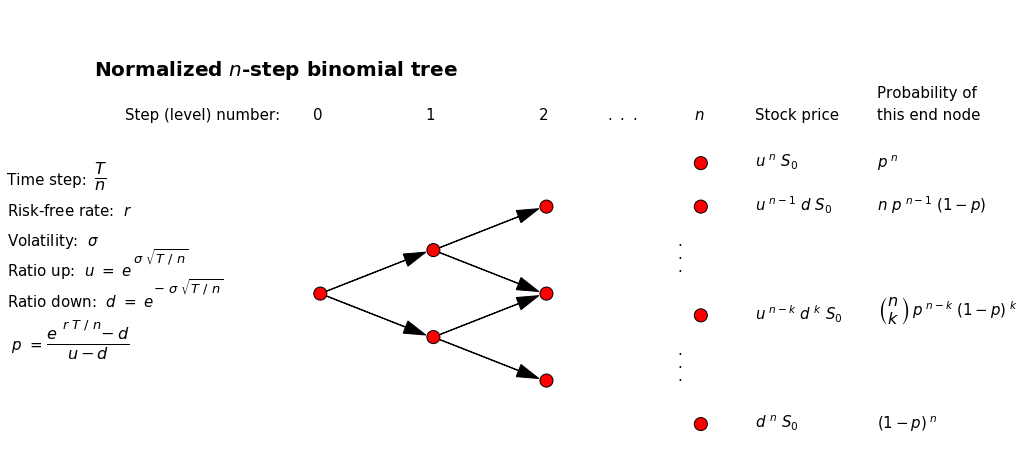

In [24]:
# === Image and text. No computation. ===

# === Importing libraries. Plot settings. ===
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
my_fontsize = 15 # font size for normal text
my_fontsize_title = 20 # title font size
my_fontsize_frac = 23 # font size for enlarging fractions that would be otherwise smaller than normal
my_fontsize_sup = 13 # smaller font for superscripts
plt.figure(figsize=(13, 8)) # resizing the figure
x,y,x2,y2 = -.3,-.25,0,-.15 # position variables

# === Circles ===
circle_start = Circle((x2+.02,y2+.5), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_d  = Circle((x2+.28,y2+.4), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_u  = Circle((x2+.28,y2+.6), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_dd = Circle((x2+.54,y2+.3), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_ud = Circle((x2+.54,y2+.5), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_uu = Circle((x2+.54,y2+.7), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_end_0 = Circle((x2+.895,y2+.8),  .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_end_1 = Circle((x2+.895,y2+.7),  .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_end_k = Circle((x2+.895,y2+.45), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_end_n = Circle((x2+.895,y2+.2),  .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
ax = plt.gca() # get current axes
ax.cla() # clear things for fresh plot
ax.set_aspect('equal') # set aspect ratio to 'equal' to keep the circles really circles
plt.axis('off') # no axes for this plot
ax.add_artist(circle_start)
ax.add_artist(circle_d)
ax.add_artist(circle_u)
ax.add_artist(circle_dd)
ax.add_artist(circle_ud)
ax.add_artist(circle_uu)
ax.add_artist(circle_end_0)
ax.add_artist(circle_end_1)
ax.add_artist(circle_end_k)
ax.add_artist(circle_end_n)

# === Arrows ===
ax.arrow(x2+.02, y2+.5, .196,  .077, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(x2+.02, y2+.5, .196, -.077, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(x2+.28, y2+.4, .196,  .077, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(x2+.28, y2+.4, .196, -.077, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(x2+.28, y2+.6, .196,  .077, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(x2+.28, y2+.6, .196, -.077, head_width=.03, head_length=.05, fc='k', ec='k')

# === Text and Math ===
ax.text(x-.2,   y+1.1,  r'Normalized $n$-step binomial tree', fontsize=my_fontsize_title, fontweight='bold')
ax.text(x-.13,  y+1,    r"Step (level) number:", fontsize=my_fontsize)
ax.text(x+.3,   y+1,    r"$0$", fontsize=my_fontsize)
ax.text(x+.56,  y+1,    r"$1$", fontsize=my_fontsize)
ax.text(x+.82,  y+1,    r"$2$", fontsize=my_fontsize)
ax.text(x+.98,  y+1,    r"$.\ .\ .$", fontsize=my_fontsize)
ax.text(x+1.18, y+1,    r"$n$", fontsize=my_fontsize)
ax.text(x+1.32, y+1,    r"Stock price", fontsize=my_fontsize)
ax.text(x+1.6,  y+1.05, r"Probability of", fontsize=my_fontsize)
ax.text(x+1.6,  y+1,    r"this end node", fontsize=my_fontsize)
ax.text(x-.4,   y+.85,  r"Time step:", fontsize=my_fontsize)
ax.text(x-.2,   y+.85,  r"$\frac{T}{n}$", fontsize=my_fontsize_frac)
ax.text(x-.4,   y+.78,  r"Risk-free rate: $\ r$", fontsize=my_fontsize)
ax.text(x-.4,   y+.71,  r"Volatility: $\ \sigma$", fontsize=my_fontsize)
ax.text(x-.4,   y+.64,  r"Ratio up: $\ u\ =\ e$", fontsize=my_fontsize)
ax.text(x-.11,  y+.67,  r"$\sigma\ \sqrt{T\ /\ n}$", fontsize=my_fontsize_sup)
ax.text(x-.4,   y+.57,  r"Ratio down: $\ d\ =\ e$", fontsize=my_fontsize)
ax.text(x-.065, y+.6,   r"$-\ \sigma\ \sqrt{T\ /\ n}$", fontsize=my_fontsize_sup)
ax.text(x-.4,   y+.47,  r"$\ p\ =$", fontsize=my_fontsize)
ax.text(x-.31,  y+.47,  r"$\frac{e^{\ \ \ \ \ \ \ \ \ \ \ } - d }{ u - d }$", fontsize=my_fontsize_frac)
ax.text(x-.275, y+.52,  r"$r\ T\ /\ n$", fontsize=my_fontsize_sup)
ax.text(x+1.32, y2+.79, r"$u^{\ n}\ S_0$", fontsize=my_fontsize)
ax.text(x+1.32, y2+.69, r"$u^{\ n-1}\ d\ S_0$", fontsize=my_fontsize)
ax.text(x+1.14, y2+.61, r".", fontsize=my_fontsize)
ax.text(x+1.14, y2+.58, r".", fontsize=my_fontsize)
ax.text(x+1.14, y2+.55, r".", fontsize=my_fontsize)
ax.text(x+1.32, y2+.44, r"$u^{\ n-k}\ d^{\ k}\ S_0$", fontsize=my_fontsize)
ax.text(x+1.14, y2+.36, r".", fontsize=my_fontsize)
ax.text(x+1.14, y2+.33, r".", fontsize=my_fontsize)
ax.text(x+1.14, y2+.30, r".", fontsize=my_fontsize)
ax.text(x+1.32, y2+.19, r"$d^{\ n}\ S_0$", fontsize=my_fontsize)
ax.text(x+1.6,  y2+.79, r"$p^{\ n}$", fontsize=my_fontsize)
ax.text(x+1.6,  y2+.69, r"$n\ p^{\ n-1}\ (1-p)$", fontsize=my_fontsize)
ax.text(x+1.6,  y2+.45, r"$\binom{n}{k}$", fontsize=my_fontsize_frac)
ax.text(x+1.68, y2+.45, r"$p^{\ n-k}\ (1-p)^{\ k}$", fontsize=my_fontsize)
ax.text(x+1.6,  y2+.19, r"$(1-p)^{\ n}$", fontsize=my_fontsize)

# === Display the entire plot ===
plt.show()

## <a name="Plot_nStepNormalized" style="text-decoration: none">Plotting the price of a European call option on a non-dividend-paying underlying stock, calculated with an $n$-step binomial tree with the risk-neutral assumption</a>

### <i>Pricer function for the normalized $n$-step tree</i>

In [27]:
# === Importing libraries ===
import numpy as np
from scipy import special

# === Definitions / General pricing formula ===
def call_binom_n_step_normalized(S0, K, sigma, r, T, n):
    ''' Function for an n-step binomial tree calculating the risk-neutral price 
        of a European call option on a non-dividend-paying underlying stock

    Attributes
    ==========
    S0:    float  current stock price, also called: spot price
    K:     float  strike price of the option
    sigma: float  volatility of the underlying stock
    r:     float  the constant risk-free short rate
    T:     float  the time to maturity given in year fractions
    n:     int    number of time steps

    Note
    ====
    sigma  has to be  >  0
    r      has to be  >  0

    Output
    ======
    p: model probability
    f: option price '''
    
    # --- Conversions --- 
    S0    = float(S0)
    K     = float(K)
    sigma = float(sigma)
    r     = float(r)
    T     = float(T)
    n     = int(n)
    u     = np.exp(sigma*np.sqrt(T/n))
    # Note: d = 1/u in this function
    
    # --- Checking constrains ---
    assert sigma > 0
    assert r > 0

    # --- Probability of going up, same at each step --- 
    p  = ( u * np.exp(r * T / n) - 1.0 ) / ( np.square(u) - 1.0 )

    # --- Option payoff values at the nodes of the (n)th level (also called: end nodes) --- 
    # Array indexing starts from the top: f_end[0] is the value at the node reached by going always up
    # The (n)th level of the tree has (n+1) nodes, thus, the argument of np.arange is (n+1)
    # For the option price at the (k)th end node, note that u^{n-k} * d^k = u^{n-2k}
    f_end = [ np.maximum( 0.0, np.power(u, n-2*k) * S0 - K ) for k in np.arange(n+1) ]

    # --- End node probabilities: binomial distribution --- 
    # Contains the binomial coefficients: special.binom(n,k)=(n atop k).
    # Make sure that  p_end  starts from the node with probability  p^n
    binomial_dist = [ special.binom(n,k) * np.power(p,n-k) * np.power(1.0-p,k) for k in np.arange(n+1) ]
                
    # --- Option price at t=0 with the n-step binomial tree ---
    f = np.exp( ( - 1.0 ) * r * T ) * np.dot( f_end, binomial_dist )

    # ---- Return the probability, p, and the option's calculated current price, f ---
    return p, f

### <i>Plotting the option price calculated with different tree sizes using the normalized $n$-step tree pricer</i>

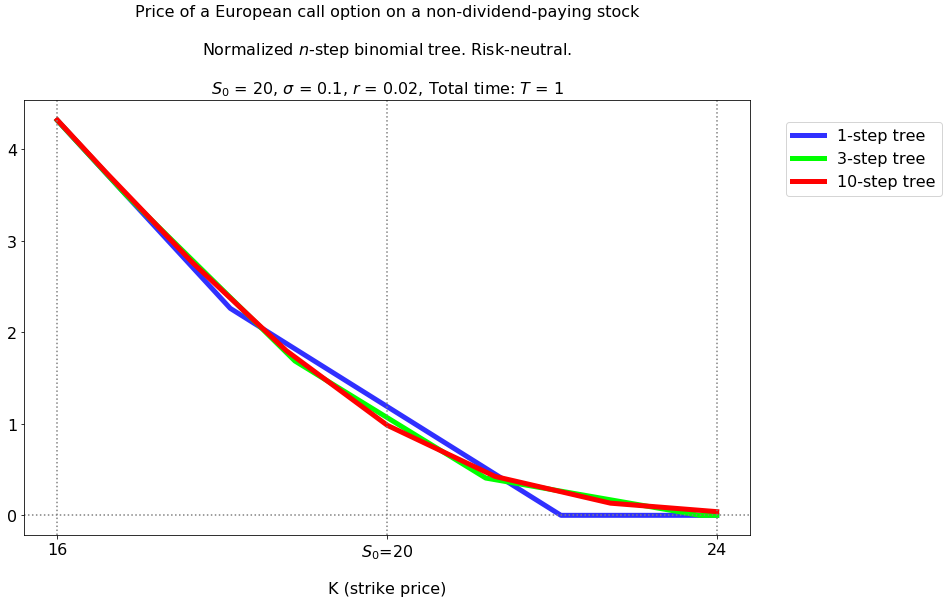

In [29]:
# === Importing libraries ===
import numpy as np
import matplotlib.pyplot as plt
import math

# === Definitions for Plotting ===
plt.figure(figsize=(13, 8)) # resizing the figure
my_fontsize = 16
r = 0.02 # risk-free rate
sigma = 0.1 # volatility parameter of the binomial tree model 
T = 1.0 # time to maturity of the option (in years)
color_list = ["#3030ff","#00ff00","#ff0000"] # colors for plotting
n_values = [1, 3, 10] # tree depth values ("tree depth": number of steps of the binomial tree)
S0 = 20 # current stock price
K_min = S0 * ( 1 - 2 * sigma ) # range of the horizontal (strike price) axis
K_max = S0 * ( 1 + 2 * sigma ) # range of the horizontal (strike price) axis
K_values = np.arange(K_min, K_max, (K_max-K_min)/1000.0) # range of strike price values to apply
S0_str = "{:.2g}".format(S0) # S0 converted to string
K_min_str = "{:.2g}".format(K_min)
K_max_str = "{:.2g}".format(K_max)
w = 5 # line width

# === Plotting the option price for each tree depth ===
for current_color, n in zip(color_list, n_values):
    # The list of calculated option price values for the n-step binomial tree
    f_list = [ call_binom_n_step_normalized(S0,K,sigma,r,T,n)[1] for K in K_values ]
    # plot the calculated curves for the option price
    plt.plot(K_values, f_list, label="%d-step tree" % n, color=current_color, linestyle='-', lw = w)

# === Plotting: Legend, Title, Axis label, Ticks ===
plt.legend(bbox_to_anchor=(1.05, .95), loc=2, borderaxespad=0., fontsize=my_fontsize) # legend position and font size
ax = plt.gca() # gca: get current axes, use this variable to access additional settings of the plot
ax.set_xticks([K_min,S0,K_max]) # tick positions along the horizontal axis
ax.set_xticklabels([K_min_str,"$S_0$="+S0_str,K_max_str], fontsize=my_fontsize) # tick labels 
plt.title("Price of a European call option on a non-dividend-paying stock\n\n"+  # plot title
         "Normalized $n$-step binomial tree. Risk-neutral.\n\n" +
          "$S_0$ = %g, $\sigma$ = %.1g, $r$ = %g, Total time: $T$ = %g" 
          % (S0, sigma, r, T), fontsize=my_fontsize)
plt.xlabel('K (strike price)', fontsize=my_fontsize, labelpad=20) # horizontal axis label
plt.tick_params(labelsize=my_fontsize) # tick text font size
plt.axhline(0, c='gray', ls='dotted') # horizontal zero axis, dotted
plt.axvline(K_min, c='gray', ls='dotted')
plt.axvline(S0, c='gray', ls='dotted')
plt.axvline(K_max, c='gray', ls='dotted')

# === Display the entire plot ===
plt.show()

### <i>Plotting with different rates and volatilities</i>

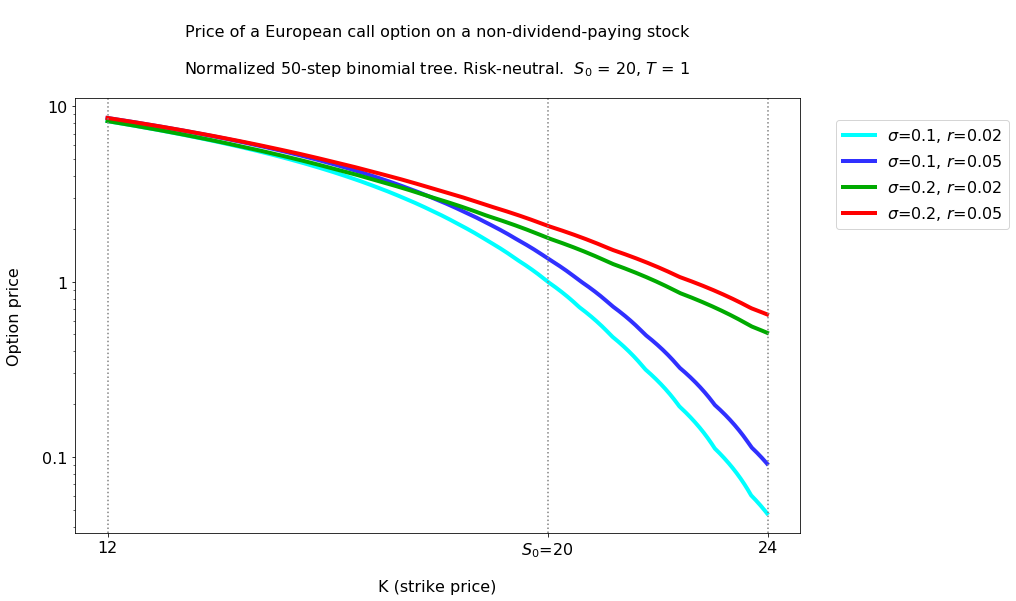

In [30]:
# === Think about the following ===
# (1) How does the price of the call option change with growing r (risk-free rate) ?
# (2) How does it change with growing sigma (volatility) ?

# === Importing libraries ===
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import FormatStrFormatter # for the semilog plot

# === Definitions for Plotting ===
plt.figure(figsize=(13, 8)) # resizing the figure
my_fontsize = 16
r_sigma_pair_list = ((.02,.1), (.05,.1), (.02,.2), (.05,.2)) # list of pairs: risk-free rate, volatility
T = 1.0 # time to maturity of the option (in years)
color_list = ["#00ffff","#3030ff","#00aa00","#ff0000"] # colors for plotting
n = 50 # tree depth: number of steps of the binomial tree
S0 = 20 # current stock price
K_min = S0 * 0.6 # range of the horizontal (strike price) axis
K_max = S0 * 1.2 # 
K_values = np.arange(K_min, K_max, (K_max-K_min)/1000.0) # range of strike price values to apply
S0_str = "{:.2g}".format(S0) # S0 converted to string
K_min_str = "{:.2g}".format(K_min)
K_max_str = "{:.2g}".format(K_max)

# === Plotting the option price for each tree depth ===
for current_color, (r, sigma) in zip(color_list, r_sigma_pair_list):
    # The list of calculated option price values for the n-step binomial tree
    f_list = [ call_binom_n_step_normalized(S0,K,sigma,r,T,n)[1] for K in K_values ]
    # Plot the calculated option price curve
    plt.semilogy(K_values, f_list, label="$\sigma$=%g, $r$=%g" % (sigma,r), color=current_color, linestyle='-', lw = 4)
    #plt.plot(K_values, f_list, label="$\sigma$=%g, $r$=%g" % (sigma,r), color=current_color, linestyle='-', lw = 4)

# === Plotting: Legend, Title, Axis label, Ticks ===
plt.legend(bbox_to_anchor=(1.05, .95), loc=2, borderaxespad=0., fontsize=my_fontsize) # legend position and font size
ax = plt.gca() # gca: get current axes, use this variable to access additional settings of the plot
ax.set_xticks([K_min,S0,K_max]) # tick positions along the horizontal axis
ax.set_xticklabels([K_min_str,"$S_0$="+S0_str,K_max_str], fontsize=my_fontsize) # tick labels 
plt.title("\nPrice of a European call option on a non-dividend-paying stock\n\n"+  # plot title
         "Normalized %d-step binomial tree. Risk-neutral.  $S_0$ = %g, $T$ = %g\n" % (n, S0, T), fontsize=my_fontsize)
plt.xlabel('K (strike price)', fontsize=my_fontsize, labelpad=20) # horizontal axis label
plt.ylabel('Option price', fontsize=my_fontsize, labelpad=20) # horizontal axis label
plt.tick_params(labelsize=my_fontsize) # tick text font size
plt.axhline(0, c='gray', ls='dotted') # horizontal zero axis, dotted
plt.axvline(K_min, c='gray', ls='dotted')
plt.axvline(S0, c='gray', ls='dotted')
plt.axvline(K_max, c='gray', ls='dotted')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g')) # for the semilog plot

# === Display the entire plot ===
plt.show()

## <a name="Next_Steps" style="text-decoration: none">Next steps</a>

* Investigate conditions / limitations of the binomial tree model
* Binomial tree pricing with risk
* Move to continuous model
  - Note: the discretized (binomial tree) and the continuous (Black-Scholes) model are both approximations